# STCN: Analyses of printers based in Deventer

In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
from IPython.core.display import display, HTML
import pandas as pd
import numpy as np
import json
import re
from stcn import *
import folium
from tqdm import tqdm
from collections import Counter

def counter_to_axes(counter_obj):
    x_axis = list(counter_obj.keys())
    y_axis = list(counter_obj.values())
    return (x_axis,y_axis)

## Number of books printed annually in Deventer

In [2]:
json_file = open('stcn_locations.json',encoding='utf-8')
json_data = json.load(json_file)

In [3]:
all_years = []

for book in json_data:
    if 'location' in book and book['location']['place_name'] == 'Deventer':
        all_years.append(int(book['year']))
        
timeline = Counter(all_years)

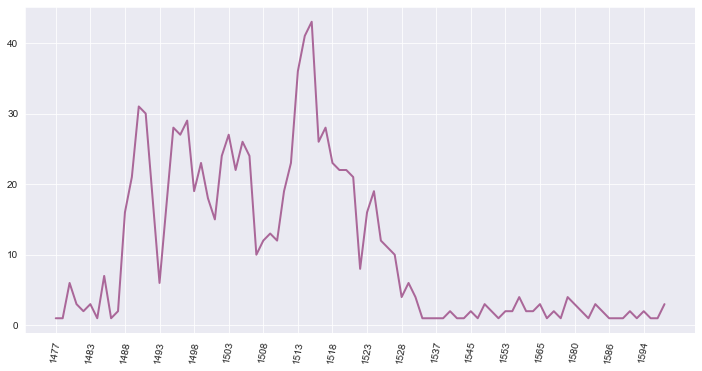

In [4]:
x_axis, y_axis = counter_to_axes(timeline)
x_axis = [str(x) for x in x_axis]

sns.set_style("darkgrid")

fig = plt.figure( figsize = ( 12, 6))
ax = sns.lineplot(x=x_axis, y=y_axis, 
                  color= '#AA6799', linestyle='solid',
                  linewidth=2 )

ax.set_xticks(ax.get_xticks()[::5]); 

plt.xticks(rotation= 80)
plt.show()

## Deventer in comparison to other cities

In [5]:
data = [] 

all_years = []
location = 'Deventer'
for book in json_data:
    if 'location' in book and book['location']['place_name'] == location:
        all_years.append(int(book['year']))
        
timeline = Counter(all_years)
for year in sorted(timeline):
    row = []
    row.append(location)
    row.append(year)
    row.append(timeline.get(year,0))
    data.append(row)
    
all_years = []
location = 'Leiden'
for book in json_data:
    if 'location' in book and book['location']['place_name'] == location:
        all_years.append(int(book['year']))
        
timeline = Counter(all_years)
for year in sorted(timeline):
    row = []
    row.append(location)
    row.append(year)
    row.append(timeline.get(year,0))
    data.append(row)
    
all_years = []
location = 'Amsterdam'
for book in json_data:
    if 'location' in book and book['location']['place_name'] == location:
        all_years.append(int(book['year']))
        
timeline = Counter(all_years)
for year in sorted(timeline):
    row = []
    row.append(location)
    row.append(year)
    row.append(timeline.get(year,0))
    data.append(row)
    
all_years = []
location = 'Zwolle'
for book in json_data:
    if 'location' in book and book['location']['place_name'] == location:
        all_years.append(int(book['year']))
        
timeline = Counter(all_years)
for year in sorted(timeline):
    row = []
    row.append(location)
    row.append(year)
    row.append(timeline.get(year,0))
    data.append(row)
    
df_timeline = pd.DataFrame(data,columns=['location','year','count'])

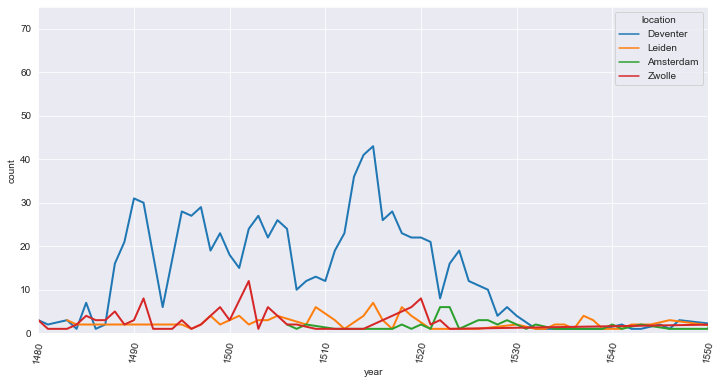

In [6]:
x_axis = 'year'
y_axis = 'count'
hue = 'location'

sns.set_style("darkgrid")

fig = plt.figure( figsize = ( 12, 6))
ax = sns.lineplot( data = df_timeline , x=x_axis, y=y_axis, 
                hue=hue , linestyle='solid',
                  linewidth=2 )

#ax.set_xticks(ax.get_xticks()[::5]); 
ax.set_xlim(1480,1550)
ax.set_ylim(0,75)
plt.xticks(rotation= 80)
plt.show()

## Most prolific printers

In [7]:
all_publishers = []
publisher_name = dict()

for book in json_data:
    if 'location' in book and book['location']['place_name'] == 'Deventer':
        for publisher in book['publishers']:
            all_publishers.append(publisher['ppn'])
            publisher_name[publisher['ppn']]= publisher['name']
        
publishers_freq = Counter(all_publishers)

The list below shows the 30 most prolific printers in Deventer. 

In [8]:
for publisher,count in publishers_freq.most_common(30):
    print(f"{publisher_name[publisher]}")

Pafraet, Richard (I)
Pafraet, Albertus
Breda, Jacobus de
Borne, Theodoricus de (I)
Steenberch, Simon (I)
Zuseler, Wessel
Borne, Theodoricus de (I, wed.)
Pafraet, Richard (II)
s.n.
Borne, Theodoricus de (II)
Cloppenburgh, Jan Evertsz (I)
Ach, Johan von
Schreiber, Nikolaus
Martens, Thierry
Horne, Ludolphus
Magirus, Ambrosius
Verwithagen, Jan (wed.)
Pafraet, Hendrik
s.n.
Campen, Fridzerdus van
Steenberch, Simon (II)


In [9]:
highest = publishers_freq.most_common(1)[0][0]

print(f'The PPN of the most prolific printer, {publisher_name[highest]} is {highest}')

The PPN of the most prolific printer, Pafraet, Richard (I) is http://data.bibliotheken.nl/id/thes/p102986762


## Richard Pafraet

In [10]:
query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX kb: <http://data.bibliotheken.nl/def#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?resource ?title ?author_name ?format ?publ_year ?language ?subject_label ?collection WHERE {
  
?resource schema:publication ?publ .
?publ schema:publishedBy <http://data.bibliotheken.nl/id/thes/p102986762> .
?resource kb:bibliographicFormat ?format .
OPTIONAL {
?resource schema:name ?title . }
OPTIONAL {
?resource schema:author ?author . 
?author schema:name ?author_name . }
OPTIONAL {
?publ schema:startDate ?publ_year . }
OPTIONAL {
?publ schema:startDate ?publ_year . }
OPTIONAL { 
?resource schema:about ?subject .
?subject skos:prefLabel ?subject_label .
} 
OPTIONAL { 
?resource schema:inLanguage ?language .
} 
OPTIONAL {
?resource schema:mainEntityOfPage ?part_of . 
?part_of schema:isPartOf <http://data.bibliotheken.nl/id/dataset/stcn> .
}

}
"""
df = run_query(query)
ids = list(df["resource.value"].unique())

print( f'The STCN contain {len(ids)} titles printed by Richard Pafraet.')


The STCN contain 463 titles printed by Richard Pafraet.


In [11]:
df_unique = df.drop_duplicates(subset='resource.value', keep="last")

nr = 10
print(f'These are the first {nr} titles:\n')

for i,row in df_unique.head(nr).iterrows():
    print( row['title.value'])
    if not( pd.isna(row['author_name.value'])):
        print(row['author_name.value'])
    print( row['publ_year.value'])
    print( row['resource.value'] , end='\n\n')

These are the first 10 titles:

Institutio moralis philosophie metrica.
Quintus Horatius Flaccus
1509
http://data.bibliotheken.nl/id/nbt/p107494000

De senectute.
Tullius
1506
http://data.bibliotheken.nl/id/nbt/p107701413

Quedam elegantissime et breuiores epistole.
M. Tullius Cicero
1507
http://data.bibliotheken.nl/id/nbt/p107701782

Tractatus duodecim s. Summulae logicales.
Petrus Hispanus
1495
http://data.bibliotheken.nl/id/nbt/p107742284

Farrago.
Alexander Hegius
14XX
http://data.bibliotheken.nl/id/nbt/p107743191

Euangelia et epistole
1502
http://data.bibliotheken.nl/id/nbt/p107701014

Doctrinale [partes I-IV].
Alexander de Villa Dei
1489
http://data.bibliotheken.nl/id/nbt/p108118908

Doctrinale [pars II].
Alexander de Villa Dei
148X
http://data.bibliotheken.nl/id/nbt/p108140598

Doctrinale [pars I].
Alexander de Villa Dei
1494
http://data.bibliotheken.nl/id/nbt/p108143619

Summulae logicales.
Petrus Hispanus
148X
http://data.bibliotheken.nl/id/nbt/p108157296



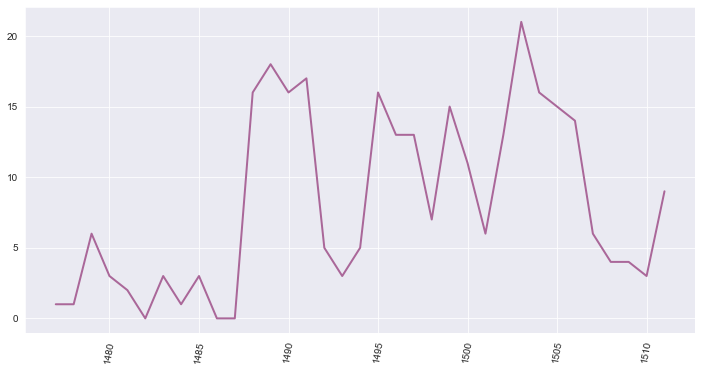

In [12]:
from collections import Counter

productivity = df_unique[pd.to_numeric(df_unique['publ_year.value'], errors = 'coerce').notnull()]
productivity = productivity.sort_values( 'publ_year.value' )
productivity['publ_year.value'] = productivity['publ_year.value'].astype(int)


earliest = productivity['publ_year.value'].min()
latest = productivity['publ_year.value'].max()

nr_books = Counter(productivity['publ_year.value'])


x_axis = []
y_axis = []

for year in range(int(earliest),int(latest)+1):
    x_axis.append(year)
    y_axis.append( nr_books[ year ] )
    
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure( figsize = ( 12, 6))
ax = sns.lineplot( x= x_axis , y= y_axis , 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

In [13]:
nr_books = df_unique.groupby('format.value')['resource.value'].count()

In [14]:
print('The books were printed in the following formats:')
for book_format,count in nr_books.iteritems():
    word = 'book'
    if count>1:
        word += 's'
    print( f'{book_format} ({count} {word})')


The books were printed in the following formats:
16° (2 books)
1° (4 books)
2° (25 books)
4° (417 books)
8° (11 books)
Other (4 books)


In [15]:
subjects = Counter(df['subject_label.value'])
subjects = subjects.most_common()
x_axis = []
y_axis = []
for s,count in subjects:
    y_axis.append(s)
    x_axis.append(count)

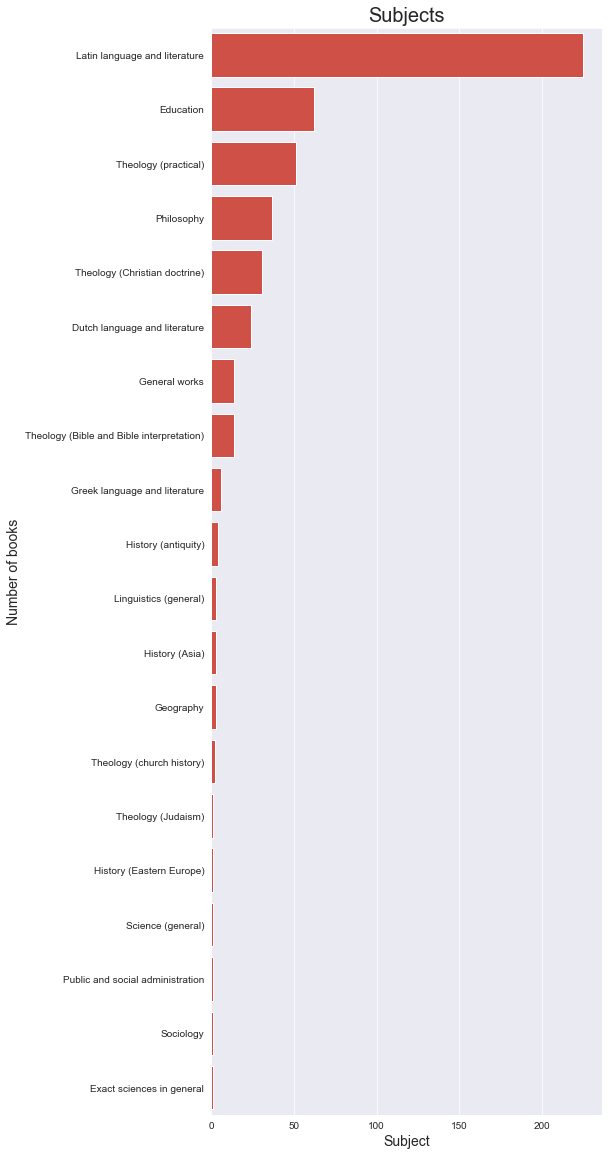

In [16]:
nr_books = nr_books.sort_index()

fig = plt.figure( figsize=( 7 , 20 ) )


graph = sns.barplot( x= x_axis, y= y_axis,  dodge=False , color = '#e63c30' )

graph.set_title('Subjects' , size = 20) 
graph.set_xlabel('Subject' , size = 14) 
graph.set_ylabel('Number of books' , size = 14 )

plt.show()

In [17]:
df_authors = df.drop_duplicates(subset= ['resource.value','author_name.value'], keep="last")
freq = Counter()
nodes = []
edges = []
for i,row in df_authors.iterrows():
    if not(pd.isna(row['author_name.value'])):
        title = row['title.value']
        #title = row['title.value']
        nodes.append( ( title , 'Book' ) )
        nodes.append( ( row['author_name.value'] , 'Author' ) )
        edges.append( ( title , row['author_name.value']) )
        freq.update( [ row['author_name.value'] ] )

nodes = set(nodes)
edges = set(edges)

In [18]:
from pyvis.network import Network
net = Network(notebook=True , height="750px", width="100%" , bgcolor="#dce5f2" )

net.force_atlas_2based(
        gravity=-60,
        central_gravity=0.01,
        spring_length=100,
        spring_strength=0.08,
        damping=0.4,
        overlap= 0 )
             
for node,label in nodes:
    node_size = 15
    if label == 'Book':
        c ='#EE7733'
    else:
        c = '#007788'
        node_size = 15 + freq[node]     
    net.add_node( node , title=node , color= c , size = node_size )
                

for source,target in edges:
    net.add_edge( source , target )
                              


net.show( f'network1.html')

## Jacobus de Breda

The identifier for Jacobus de Breda is http://data.bibliotheken.nl/id/thes/p102995621

In [19]:
query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX kb: <http://data.bibliotheken.nl/def#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?resource ?title ?author_name ?format ?publ_year ?language ?subject_label ?collection WHERE {
  
?resource schema:publication ?publ .
?publ schema:publishedBy <http://data.bibliotheken.nl/id/thes/p102995621> .
?resource kb:bibliographicFormat ?format .
OPTIONAL {
?resource schema:name ?title . }
OPTIONAL {
?resource schema:author ?author . 
?author schema:name ?author_name . }
OPTIONAL {
?publ schema:startDate ?publ_year . }
OPTIONAL {
?publ schema:startDate ?publ_year . }
OPTIONAL { 
?resource schema:about ?subject .
?subject skos:prefLabel ?subject_label .
} 
OPTIONAL { 
?resource schema:inLanguage ?language .
} 
OPTIONAL {
?resource schema:mainEntityOfPage ?part_of . 
?part_of schema:isPartOf <http://data.bibliotheken.nl/id/dataset/stcn> .
}

}
"""
df = run_query(query)
df_unique = df.drop_duplicates(subset='resource.value', keep="last")

ids = list(df["resource.value"].unique())

print( f'The STCN contain {len(ids)} titles printed by Jacobus de Breda|.')


The STCN contain 446 titles printed by Jacobus de Breda|.


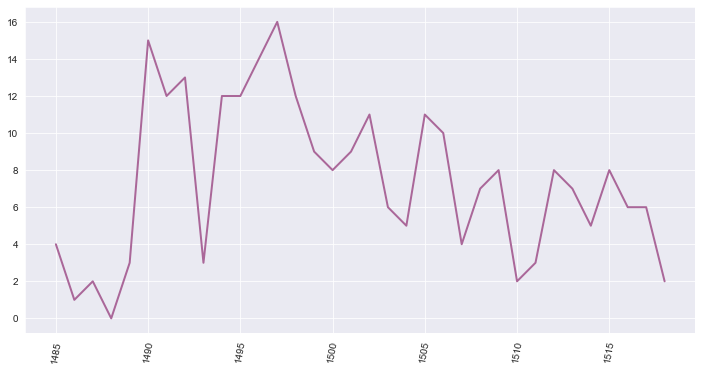

In [20]:
from collections import Counter

productivity = df_unique[pd.to_numeric(df_unique['publ_year.value'], errors = 'coerce').notnull()]
productivity = productivity.sort_values( 'publ_year.value' )
productivity['publ_year.value'] = productivity['publ_year.value'].astype(int)


earliest = productivity['publ_year.value'].min()
latest = productivity['publ_year.value'].max()

nr_books = Counter(productivity['publ_year.value'])


x_axis = []
y_axis = []

for year in range(int(earliest),int(latest)+1):
    x_axis.append(year)
    y_axis.append( nr_books[ year ] )
    
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure( figsize = ( 12, 6))
ax = sns.lineplot( x= x_axis , y= y_axis , 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

In [21]:
df_authors = df.drop_duplicates(subset= ['resource.value','author_name.value'], keep="last")
freq = Counter()
nodes = []
edges = []
for i,row in df_authors.iterrows():
    if not(pd.isna(row['author_name.value'])):
        title = row['title.value']
        #title = row['title.value']
        nodes.append( ( title , 'Book' ) )
        nodes.append( ( row['author_name.value'] , 'Author' ) )
        edges.append( ( title , row['author_name.value']) )
        freq.update( [ row['author_name.value'] ] )

nodes = set(nodes)
edges = set(edges)

In [22]:
from pyvis.network import Network
net = Network(notebook=True , height="750px", width="100%" , bgcolor="#dce5f2" )

net.force_atlas_2based(
        gravity=-60,
        central_gravity=0.01,
        spring_length=100,
        spring_strength=0.08,
        damping=0.4,
        overlap= 0 )
             
for node,label in nodes:
    node_size = 15
    if label == 'Book':
        c ='#EE7733'
    else:
        c = '#007788'
        node_size = 15 + freq[node]     
    net.add_node( node , title=node , color= c , size = node_size )
                

for source,target in edges:
    net.add_edge( source , target )
                              

